# Drug Reviews Sentiment Analysis and Summarization

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./drugsComTrain_raw.csv')
test = pd.read_csv('./drugsComTest_raw.csv')

In [3]:
print("Shape of training dataset:", train.shape)
train.head()

Shape of training dataset: (161297, 7)


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
data = pd.concat([train, test])
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,215063.0,116039.364814,67007.913366,0.0,58115.5,115867.0,173963.5,232291.0
rating,215063.0,6.990008,3.275554,1.0,5.0,8.0,10.0,10.0
usefulCount,215063.0,28.001004,36.346069,0.0,6.0,16.0,36.0,1291.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   215063 non-null  int64  
 1   drugName     215063 non-null  object 
 2   condition    213869 non-null  object 
 3   review       215063 non-null  object 
 4   rating       215063 non-null  float64
 5   date         215063 non-null  object 
 6   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


In [7]:
data.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

In [8]:
data.isnull().any()

Unnamed: 0     False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

"condition" column have some NaNs.

In [9]:
data.isnull().sum()

Unnamed: 0        0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

## Data Visualization

### Get top drugs by rating

In [10]:
def plot_top_drugs(data, rating_value=10, top_n=25):
    rating = dict(data.loc[data.rating == rating_value, "drugName"].value_counts())
    drugname = list(rating.keys())
    drug_rating = list(rating.values())

    sb.set(font_scale=1.2, style='darkgrid')
    plt.rcParams['figure.figsize'] = [16, 8]

    sb_rating = sb.barplot(x=drugname[:top_n], y=drug_rating[:top_n])

    for i in sb_rating.containers:
        sb_rating.bar_label(i)

    sb_rating.set_title(f'Top {top_n} Drugs with {rating_value}/10 Rating')
    sb_rating.set_ylabel("Number of Ratings")
    sb_rating.set_xlabel("Drug Names")
    plt.setp(sb_rating.get_xticklabels(), rotation=90)

    plt.show()

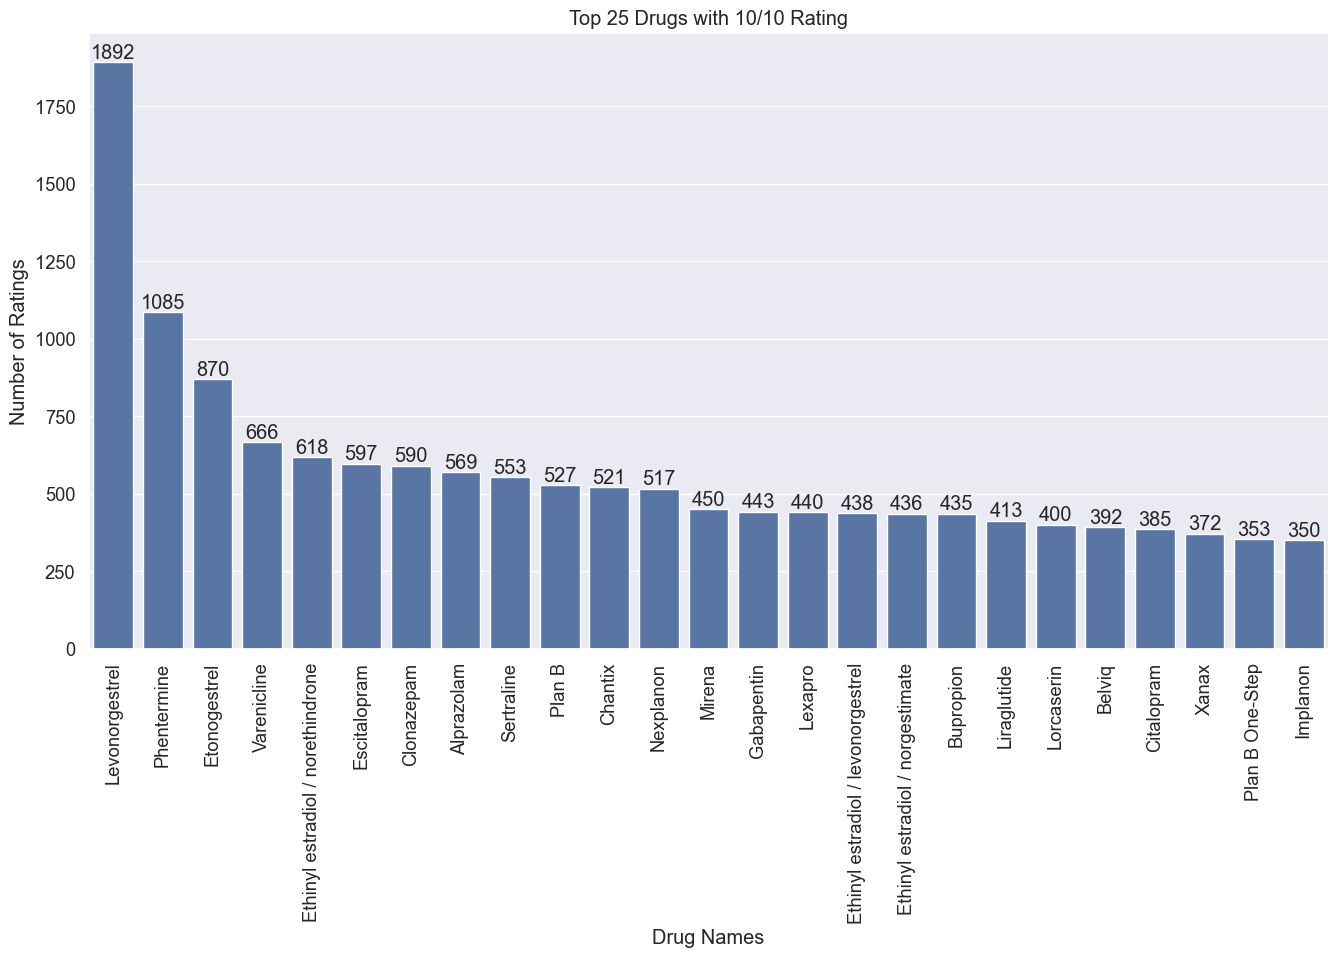

In [11]:
plot_top_drugs(data)

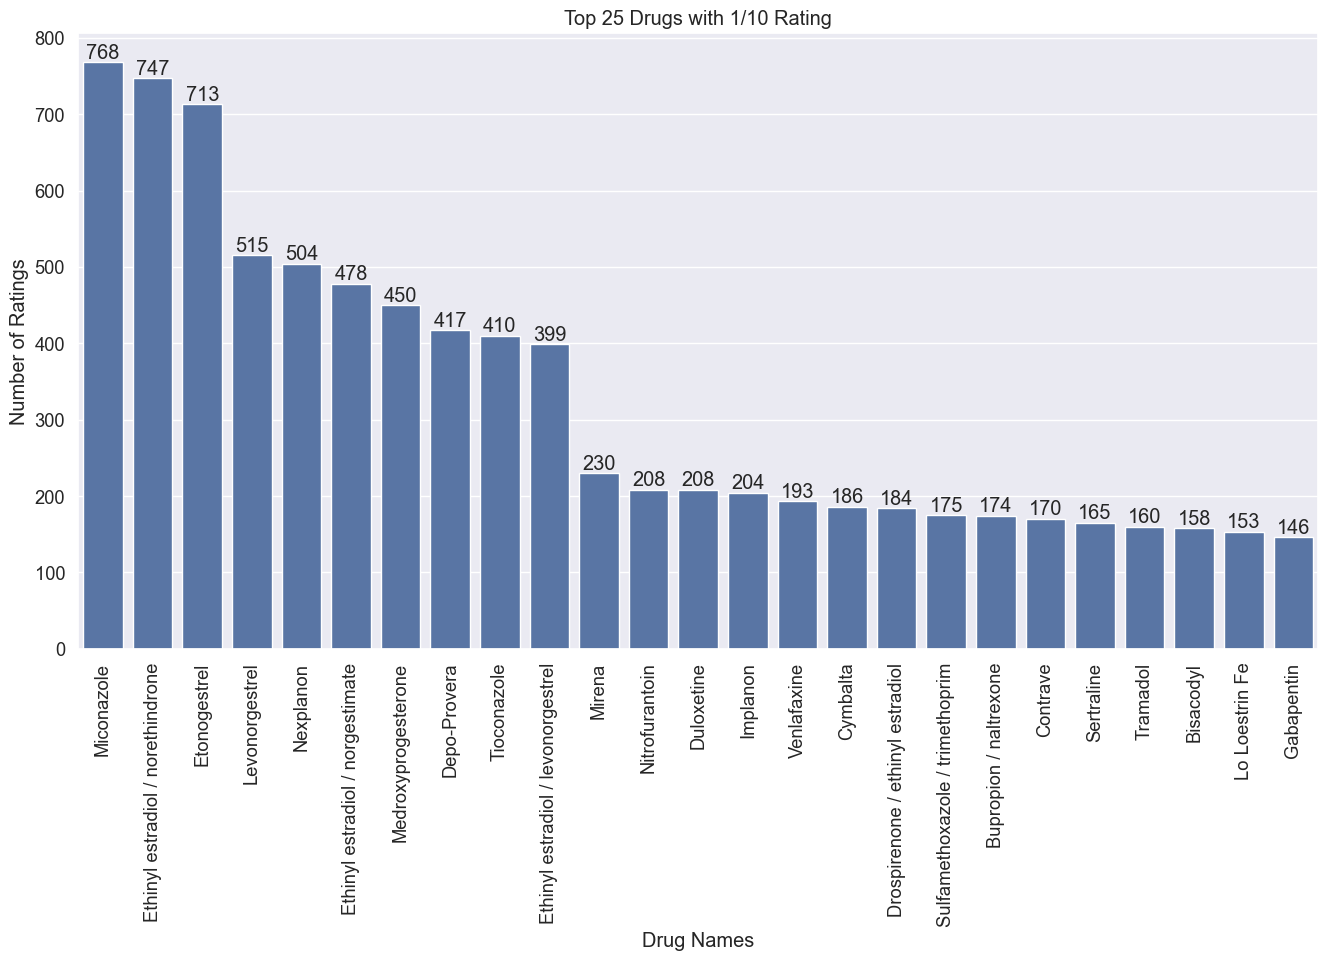

In [12]:
plot_top_drugs(data, 1, 25)

### Word cloud for the reviews

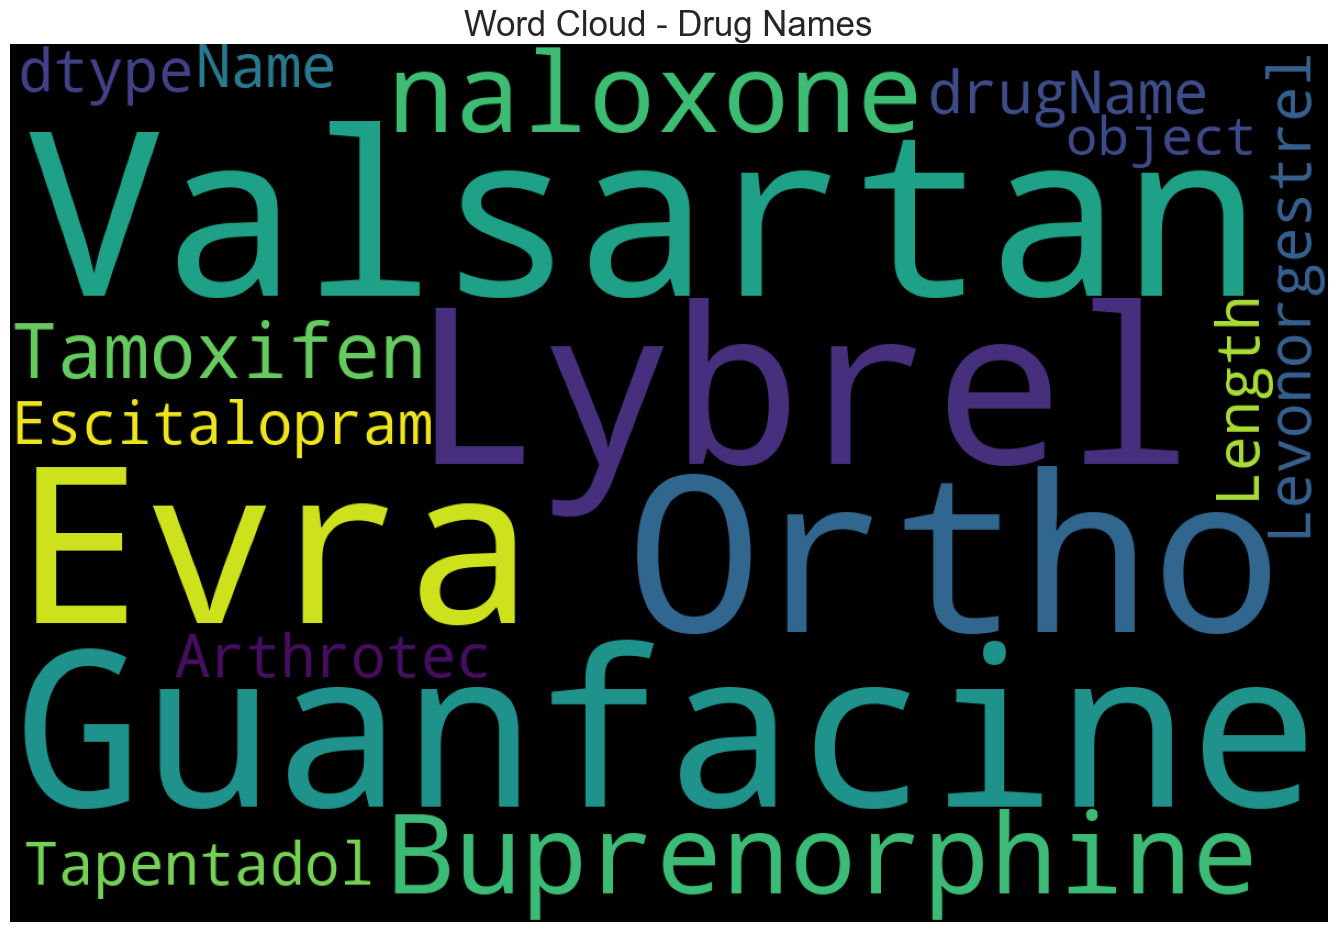

In [13]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords = stopwords, width = 1200, height = 800).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (17, 17)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

### Top Conditions

Text(0, 0.5, 'Count')

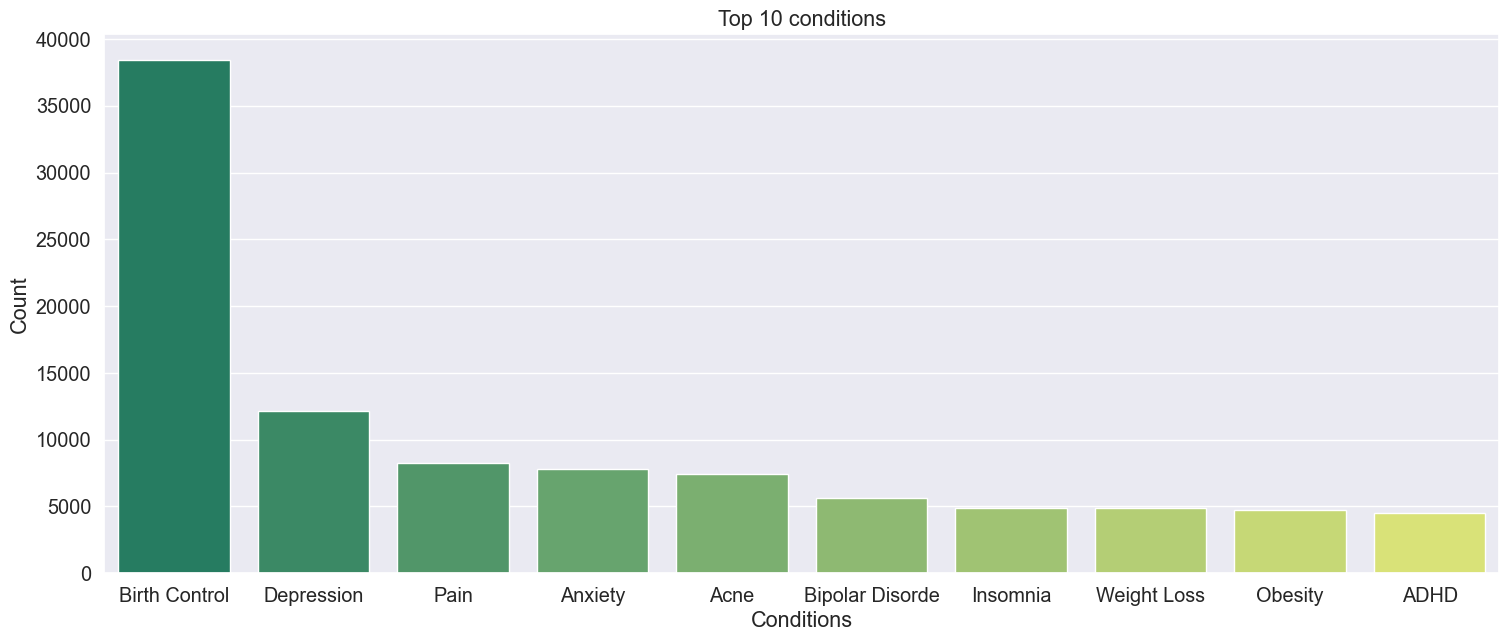

In [14]:
cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sb.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sb_ = sb.barplot(x = top_condition, y = values, palette = 'summer')
sb_.set_title("Top 10 conditions")
sb_.set_xlabel("Conditions")
sb_.set_ylabel("Count")

### Top 10 Drugs used for Birth Control

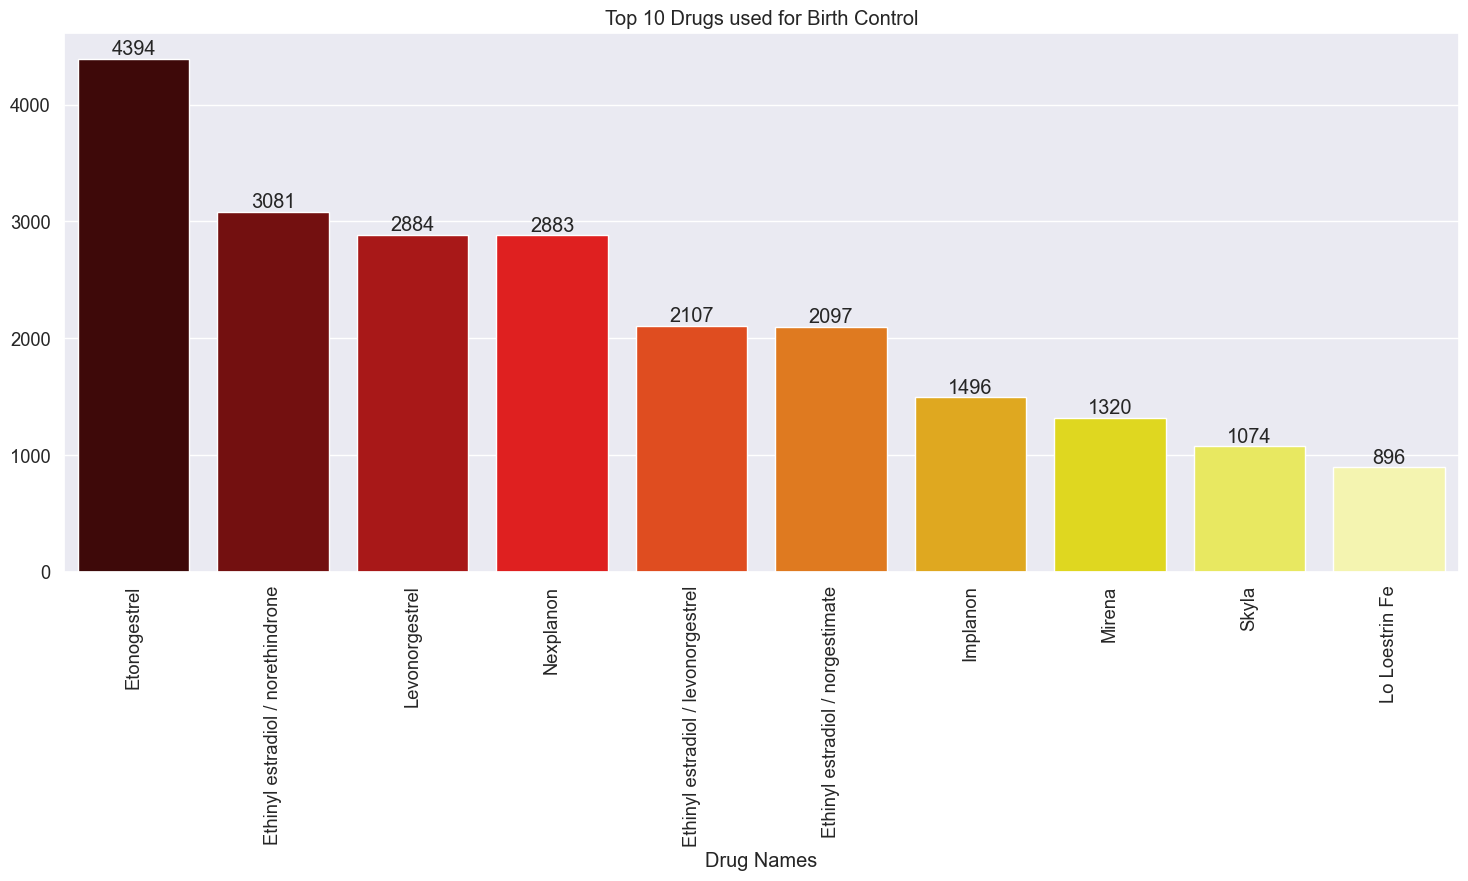

In [15]:
df1 = data[data['condition'] == 'Birth Control']['drugName'].value_counts()[0: 10]
sb.set(font_scale = 1.2, style = 'darkgrid')

sb_ = sb.barplot(x = df1.index, y = df1.values, palette = 'hot')

for i in sb_.containers:
    sb_.bar_label(i,)
    
sb_.set_xlabel('Drug Names')
sb_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sb_.get_xticklabels(), rotation = 90)
plt.show()

In [35]:
data.loc[(data['rating'] >= 5), 'Review_Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review_Sentiment'] = 0

data['Review_Sentiment'].value_counts()

Review_Sentiment
1.0    161491
0.0     53572
Name: count, dtype: int64

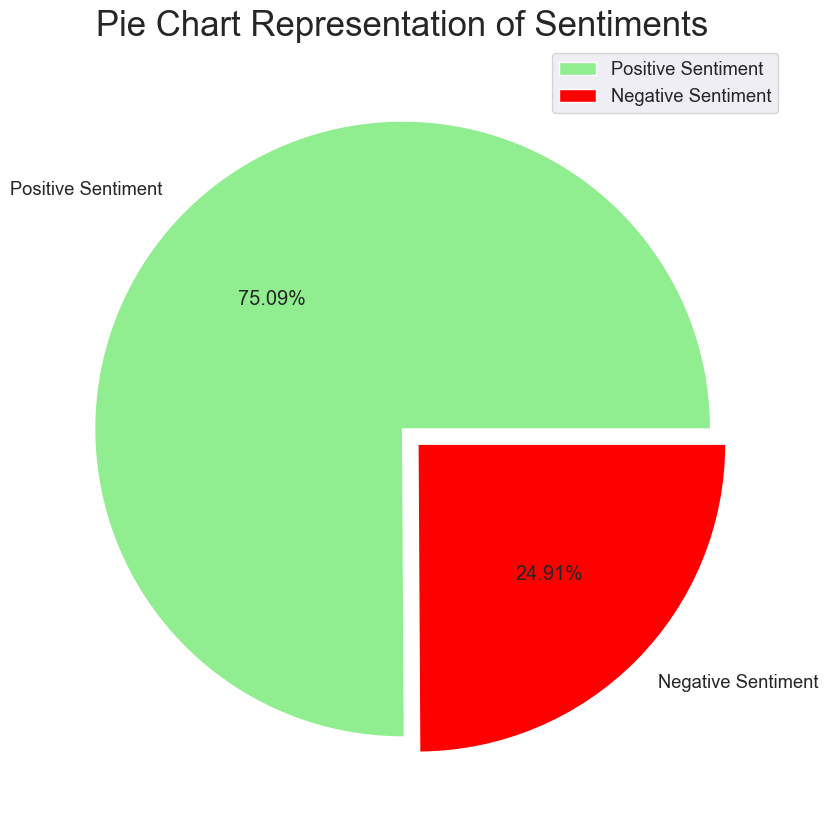

In [33]:
size = [161491, 53572] 
colors = ['lightgreen', 'red'] 
labels = "Positive Sentiment","Negative Sentiment" 
explode = [0, 0.07]

plt.rcParams['figure.figsize'] = (10, 10) 
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off') 
plt.title('Pie Chart Representation of Sentiments', fontsize = 25) 
plt.legend() 
plt.show()

In [18]:
data.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review_Sentiment'],
      dtype='object')

### Transforming the Date column

In [19]:
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# extracting year from date
data['Year'] = data['date'].dt.year

# extracting the month from the date
data['month'] = data['date'].dt.month

# extracting the days from the date
data['day'] = data['date'].dt.day

In [20]:
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,day
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,1.0,2012,5,20
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,1.0,2010,4,27
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,1.0,2009,12,14
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,1.0,2015,11,3
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37,1.0,2016,11,27


## Feature Engineering

In [21]:
"""
1. Lowercasing the text.
2. Removing the repeating pattern of &#039;.
3. Removing all special characters.
4. Removing non-ASCII characters.
5. Removing leading and trailing whitespaces.
6. Replacing multiple spaces with a single space.
7. Replacing two or more dots with one.
"""
import re

patterns = {
        "&#039;": re.compile(r"&#039;"),
        "special_chars": re.compile(r"[^\w\d\s]"),
        "non_ascii": re.compile(r"[^\x00-\x7F]+"),
        "leading_trailing_spaces": re.compile(r"^\s+|\s+$"),
        "multiple_spaces": re.compile(r"\s+"),
        "multiple_dots": re.compile(r"\.{2,}")
    }
    
def clean_text(text):
    text = text.lower()  # Lowercasing
    text = patterns["&#039;"].sub("", text)
    text = patterns["special_chars"].sub(" ", text)
    text = patterns["non_ascii"].sub(" ", text)
    text = patterns["leading_trailing_spaces"].sub("", text)
    text = patterns["multiple_spaces"].sub(" ", text)
    text = patterns["multiple_dots"].sub(" ", text)
    return text

data['review_clean'] = data['review'].apply(clean_text)

### Removing stop words

In [22]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

# Removing the stopwords
stop_words = set(stopwords.words('english'))
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

## Add sentiment column

In [23]:
def sentiment(review):
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

data['sentiment'] = sentiment(data['review_clean'])

## Model training

### Light GBM

In [24]:
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [25]:
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,Year,month,day,review_clean,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27,1.0,2012,5,20,side effect take combination bystolic 5 mg fis...,0.000000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192,1.0,2010,4,27,son halfway fourth week intuniv became concern...,0.148611
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17,1.0,2009,12,14,used take another oral contraceptive 21 pill c...,0.119805
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10,1.0,2015,11,3,first time using form birth control im glad we...,0.262500
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37,1.0,2016,11,27,suboxone completely turned life around feel he...,0.194444


In [26]:
features = data[['usefulCount', 'sentiment', 'day', 'month', 'Year']]

target = data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (161297, 5)
The Test set size  (53766, 5)


The Accuracy of the model is :  0.7982740021574973
Precision:  0.7816708539837578
Recall:  0.7982740021574973
F1 Score:  0.7768046625100817


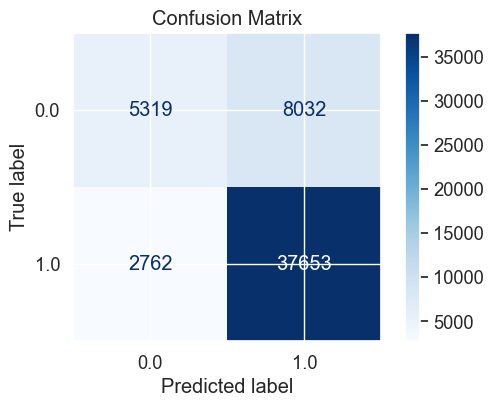

In [36]:
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

clf = LGBMClassifier(
    n_estimators=10000,
    learning_rate=0.10,
    num_leaves=30,
    subsample=0.9,
    max_depth=7,
    reg_alpha=0.1,
    reg_lambda=0.1,
    min_split_gain=0.01,
    min_child_weight=2,
    silent=-1,
    verbose=-1,
)

model = clf.fit(X_train, y_train)

predictions = model.predict(X_test)

conf_matrix_light_gbm = confusion_matrix(y_test, predictions)
precision_light_gbm = precision_score(y_test, predictions, average='weighted') 
recall_light_gbm = recall_score(y_test, predictions, average='weighted')        
f1_light_gbm = f1_score(y_test, predictions, average='weighted')                
accuracy_light_gbm = accuracy_score(y_test, predictions);

print("The Accuracy of the model is : ", accuracy_light_gbm)
print("Precision: ", precision_light_gbm)
print("Recall: ", recall_light_gbm)
print("F1 Score: ", f1_light_gbm)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
plt.figure(figsize=(6, 4))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()

### MLP Classifier

The Accuracy of the ANN model is :  0.7721236469144068
Precision:  0.7445177486952587
Recall:  0.7721236469144068
F1-Score:  0.7297742014955263


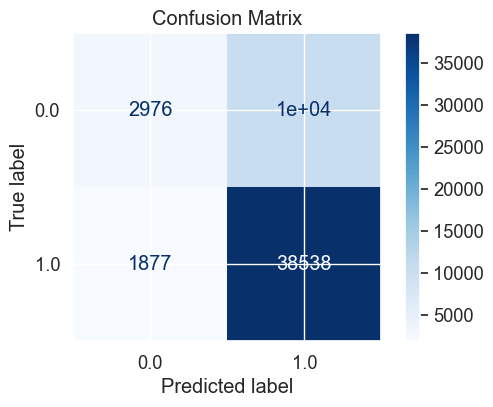

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

ann = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200, random_state=1)

model_ann = ann.fit(X_train, y_train)

predictions_ann = model_ann.predict(X_test)

precision_mlp = precision_score(y_test, predictions_ann, average='weighted')
recall_mlp = recall_score(y_test, predictions_ann, average='weighted')
f1_mlp = f1_score(y_test, predictions_ann, average='weighted')
conf_matrix_mlp = confusion_matrix(y_test, predictions_ann)
accuracy_mlp = accuracy_score(y_test, predictions_ann)
print("The Accuracy of the ANN model is : ", accuracy_mlp)
print("Precision: ", precision_mlp)
print("Recall: ", recall_mlp)
print("F1-Score: ", f1_mlp)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_mlp, display_labels=ann.classes_)
plt.figure(figsize=(6, 4))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()

### Decision Tree Classifier

The Accuracy of the Decision Tree model is :  0.8720008927575047
Precision:  0.8745081129010669
Recall:  0.8720008927575047
F1-Score:  0.873079651048774


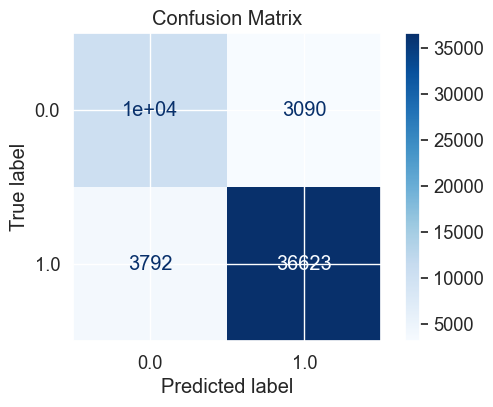

In [38]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(
    criterion='gini',  # You can also use 'entropy'
    max_depth=None,     # You can set a specific depth to control overfitting
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=1
)

model_dt = decision_tree.fit(X_train, y_train)

predictions_dt = model_dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, predictions_dt)
conf_matrix_dt = confusion_matrix(y_test, predictions_dt)
precision_dt = precision_score(y_test, predictions_dt, average='weighted')
recall_dt = recall_score(y_test, predictions_dt, average='weighted')
f1_dt = f1_score(y_test, predictions_dt, average='weighted')

print("The Accuracy of the Decision Tree model is : ", accuracy_dt)
print("Precision: ", precision_dt)
print("Recall: ", recall_dt)
print("F1-Score: ", f1_dt)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=decision_tree.classes_)
plt.figure(figsize=(6, 4))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classifier

The Test Accuracy of the Random Forest model is :  0.903675185061191
Precision:  0.9015403342755318
Recall:  0.903675185061191
F1 Score:  0.9014975211117319


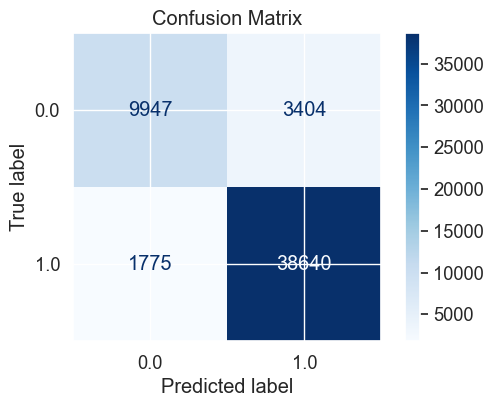

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

rf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    random_state=1
)

model_rf = rf.fit(X_train, y_train)

predictions_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, predictions_rf)
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)
precision_rf = precision_score(y_test, predictions_rf, average='weighted')  
recall_rf = recall_score(y_test, predictions_rf, average='weighted')        
f1_rf = f1_score(y_test, predictions_rf, average='weighted')                

print("The Test Accuracy of the Random Forest model is : ", accuracy_rf)
print("Precision: ", precision_rf)
print("Recall: ", recall_rf)
print("F1 Score: ", f1_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=rf.classes_)
plt.figure(figsize=(6, 4))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()

### Stacking Classifier

The Accuracy of the stacking model is :  0.7992969534650151
Precision:  0.7830447388194852
Recall:  0.7992969534650151
F1 Score:  0.7807776386714373


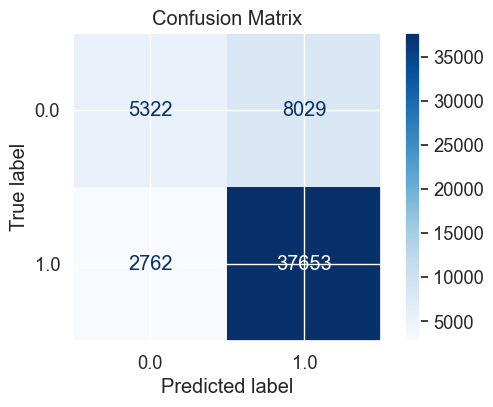

In [40]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from lightgbm import LGBMClassifier

# Initialize the base classifiers
base_learners = [
    ('lgbm', LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=0.9,
        max_depth=7,
        reg_alpha=0.1,
        reg_lambda=0.1,
        min_split_gain=0.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
    )),
    ('dt', DecisionTreeClassifier(max_depth=5)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=7))
]

meta_classifier = LogisticRegression()

stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_classifier,
    cv=5,
    stack_method='predict_proba'
)

stacking_model = stacking_clf.fit(X_train, y_train)

stacking_predictions = stacking_model.predict(X_test)

accuracy_stc = accuracy_score(y_test, stacking_predictions)
conf_matrix_stc = confusion_matrix(y_test, stacking_predictions)
precision_stc = precision_score(y_test, stacking_predictions, average='weighted') 
recall_stc = recall_score(y_test, stacking_predictions, average='weighted')        
f1_stc = f1_score(y_test, stacking_predictions, average='weighted')

print("The Accuracy of the stacking model is : ", accuracy_stc)
print("Precision: ", precision_stc)
print("Recall: ", recall_stc)
print("F1 Score: ", f1_stc)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_stc, display_labels=stacking_clf.classes_)
plt.figure(figsize=(6, 4))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()

In [41]:

metrics = {
    "Model": ["LightGBM", "MLP Classifier", "Decision Tree", "Random Forest", "Stacking Classifier"],
    "Accuracy": [accuracy_light_gbm, accuracy_mlp, accuracy_dt, accuracy_rf, accuracy_stc],
    "Precision": [precision_light_gbm, precision_mlp, precision_dt, precision_rf, precision_stc],
    "Recall": [recall_light_gbm, recall_mlp, precision_dt, precision_rf, precision_stc],
    "F1 Score": [f1_light_gbm, f1_mlp, f1_dt, f1_rf, f1_stc]
}


metrics_df = pd.DataFrame(metrics)

print("Model Metrics:")
display(metrics_df)

best_model = metrics_df.loc[metrics_df['F1 Score'].idxmax()]

print("\nBest Model Based on F1 Score:")
print(best_model)

metrics_df.style.highlight_max(axis=0)


Model Metrics:


,Model,Accuracy,Precision,Recall,F1 Score
0,LightGBM,0.798274,0.781671,0.798274,0.776805
1,MLP Classifier,0.772124,0.744518,0.772124,0.729774
2,Decision Tree,0.872001,0.874508,0.874508,0.873080
3,Random Forest,0.903675,0.901540,0.901540,0.901498
4,Stacking Classifier,0.799297,0.783045,0.783045,0.780778



Best Model Based on F1 Score:
Model        Random Forest
Accuracy          0.903675
Precision          0.90154
Recall             0.90154
F1 Score          0.901498
Name: 3, dtype: object


,Model,Accuracy,Precision,Recall,F1 Score
0,LightGBM,0.798274,0.781671,0.798274,0.776805
1,MLP Classifier,0.772124,0.744518,0.772124,0.729774
2,Decision Tree,0.872001,0.874508,0.874508,0.873080
3,Random Forest,0.903675,0.901540,0.901540,0.901498
4,Stacking Classifier,0.799297,0.783045,0.783045,0.780778
